<a href="https://colab.research.google.com/github/Prince-yori/Decison_tree/blob/main/Desision_Tree_with_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/iris.csv')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
print("Dimenssion of dataset",data.shape)
print("Number of rows in the dataset", data.shape[0])
print("Number of columns in the dataset", data.shape[1])

Dimenssion of dataset (150, 5)
Number of rows in the dataset 150
Number of columns in the dataset 5


#### EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


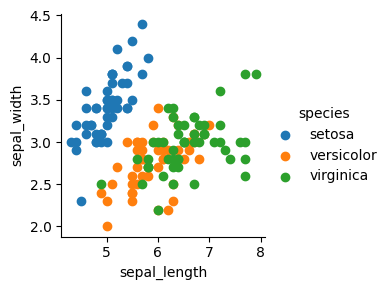

In [8]:
# Scatter plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(data, hue = "species") \
  .map(plt.scatter, 'sepal_length','sepal_width')\
  .add_legend();
plt.show()

###### OBSERVATIONS WE GET ARE:-
- USING SEPAL_LENGTH AND SEPAL_WIDTH FEATURES , WE CAN DISTINGUISH SETOSA FLOWERS FROM OTHERS.
- SEPERATING VERSICOLOR FROM VIGNICA IS MUCH HARDER AS THEY CONSIDERABLE OVERLAP.

### PAIRPLOT ON THE DATA
PAIR PLOT MAKES HIGH-LEVEL SCATTER PLOTS TO CAPTURE RELATIONSHIP BETWEEN MULTIPLE VARIABLES WITHIN A DATAFRAME.

###### DISADVANTAGES:
- CAN BE USED WHEN NUMBER OF FEATURES ARE HIGH
- CANNOT VISUALIZE HIGHER DIMESIONAL PATTERNS IN 3-D AND 4-D
- ONLY POSSIBLE TO VIEW 2D PATTERNS


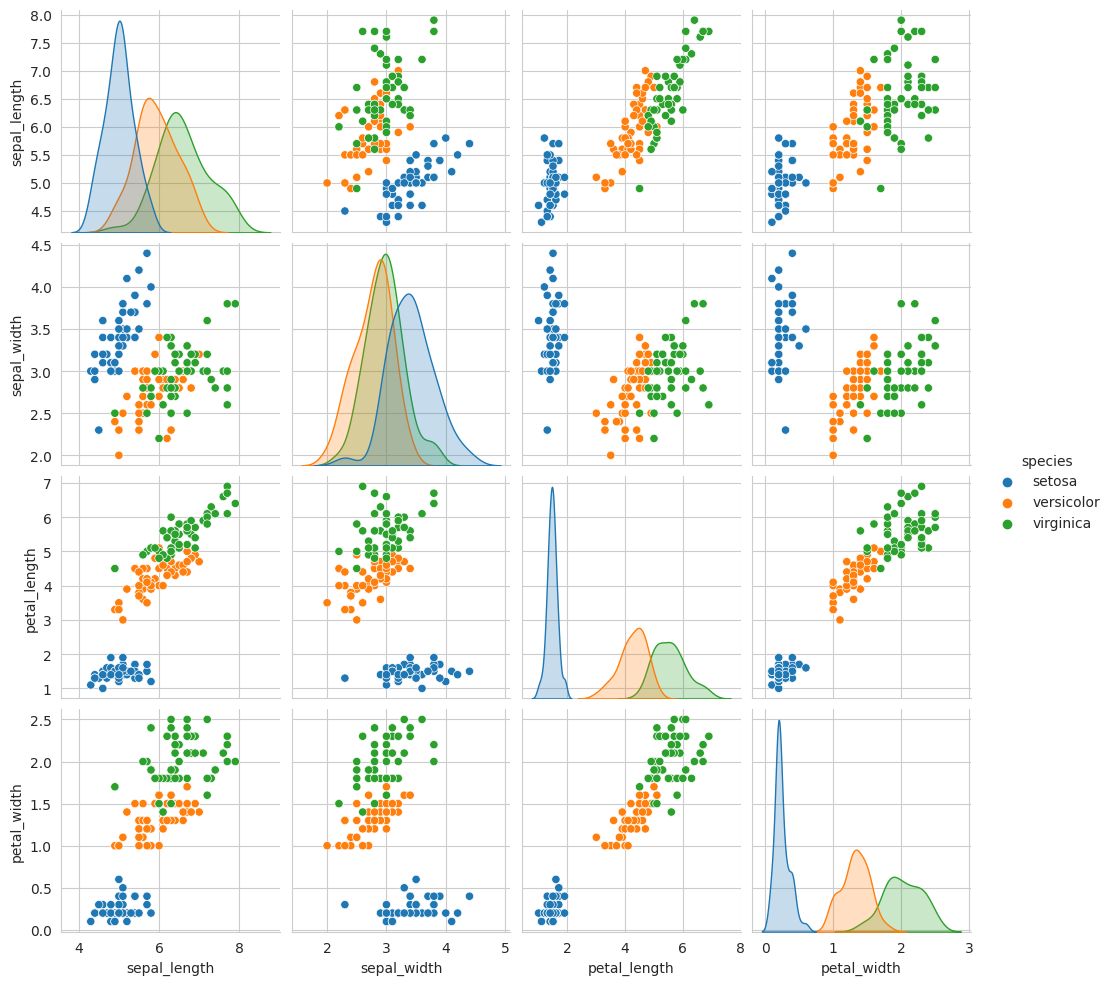

In [9]:
sns.set_style("whitegrid");
sns.pairplot(data, hue = "species")
plt.show()

#### Observations:
- For sepal_width: we can see virginica and versicolor are fully overlapped.
- For sepal_length: we can't seperate any class because all of them are overlapped. From the observation, sepal_length is worst than petal_lenght and patel_width.
- As we compared petal length and petal width then petal length the setosa are better separable than using patel width. There is overlap betwen versicolor and verginica.


<Axes: >

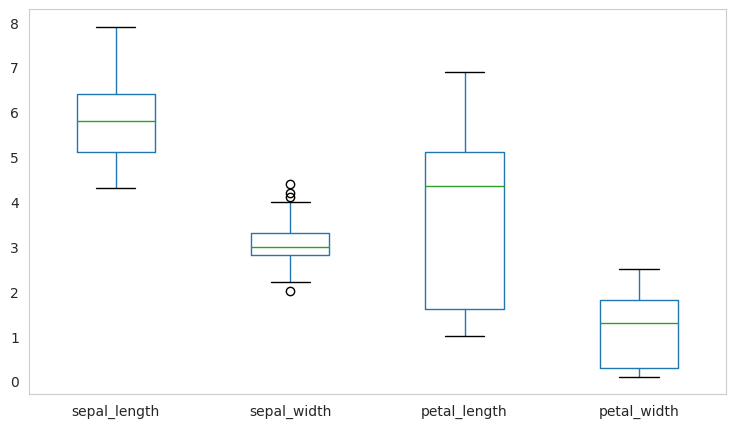

In [10]:
# How to plot a boxplot

data.boxplot(column = ['sepal_length','sepal_width', 'petal_length','petal_width'], figsize = (9,5), grid = False)

In [11]:
# Indenitfyin the missing value
miss_val = data.isna().sum()
miss_val

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
# Extracting dataframe fro only 'Objeect ' datatype

data_ct = data.select_dtypes(include = 'object')
data_ct.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [14]:
# We will cehck data points for each class
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Text(0.5, 1.0, 'Species distribution')

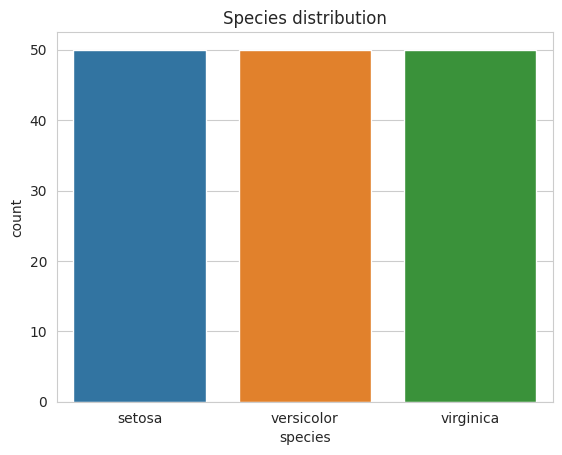

In [15]:
# we have plot countplot for each species
sns.countplot(x = data['species'] )
plt.title("Species distribution")

In [16]:
# labelEncoder
from sklearn.preprocessing import LabelEncoder

In [17]:
l_e = LabelEncoder()

#  we will encode our column 'species'
data['species'] = l_e.fit_transform(data['species'])

In [18]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
data['species'].unique()

array([0, 1, 2])

In [20]:
# Correlation:- Correlation is a statitical technique that can show wether and how strongly pairs of variables are related.

corr = data.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

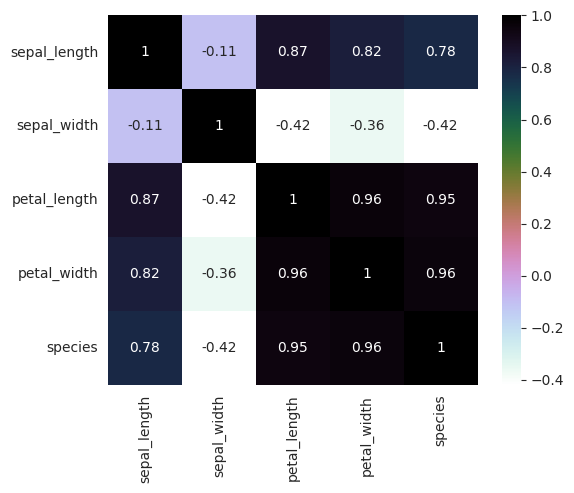

In [21]:
sns.heatmap(corr, annot = True, cmap = 'cubehelix_r', square = True)

##### Splitting Dataset into train and validation

In [22]:
# Splitting Data set into train and validation
from sklearn.model_selection import train_test_split # this train test split helps us to split our data for training and testing purposes.
train, test = train_test_split(data,test_size = 0.30)

In [24]:
# Considerin only higly correlated features for training and validation

train_x  = train.drop(['species'], axis = 1)
train_y = train['species']

test_x = test.drop(['species'], axis = 1)
test_y = test['species']

In [25]:
# If we want to check the dimession of train and test dataset

print('Dimession of train_x:', train_x.shape)
print('Dimession of train_y:', train_y.shape)
print('Dimession of test_x:', test_x.shape)
print('Dimession of test_y:', test_y.shape)

Dimession of train_x: (105, 4)
Dimession of train_y: (105,)
Dimession of test_x: (45, 4)
Dimession of test_y: (45,)


In [29]:
# We will implement the Decision Tree Classifier

# We build a model basd on gini impurity.

from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier(random_state = 0,max_depth = 3, criterion = "gini")
model_1.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [30]:
#Predict Species for test data
pred = model_1.predict(test_x)
pred

array([1, 2, 1, 1, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1,
       0, 0, 0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0,
       0])

In [32]:
# Validtion of built model
from sklearn.metrics import accuracy_score

print("The acuuracuy of the Decision Tree is {}%". format(round(accuracy_score(pred,test_y)*100,2)))

The acuuracuy of the Decision Tree is 95.56%


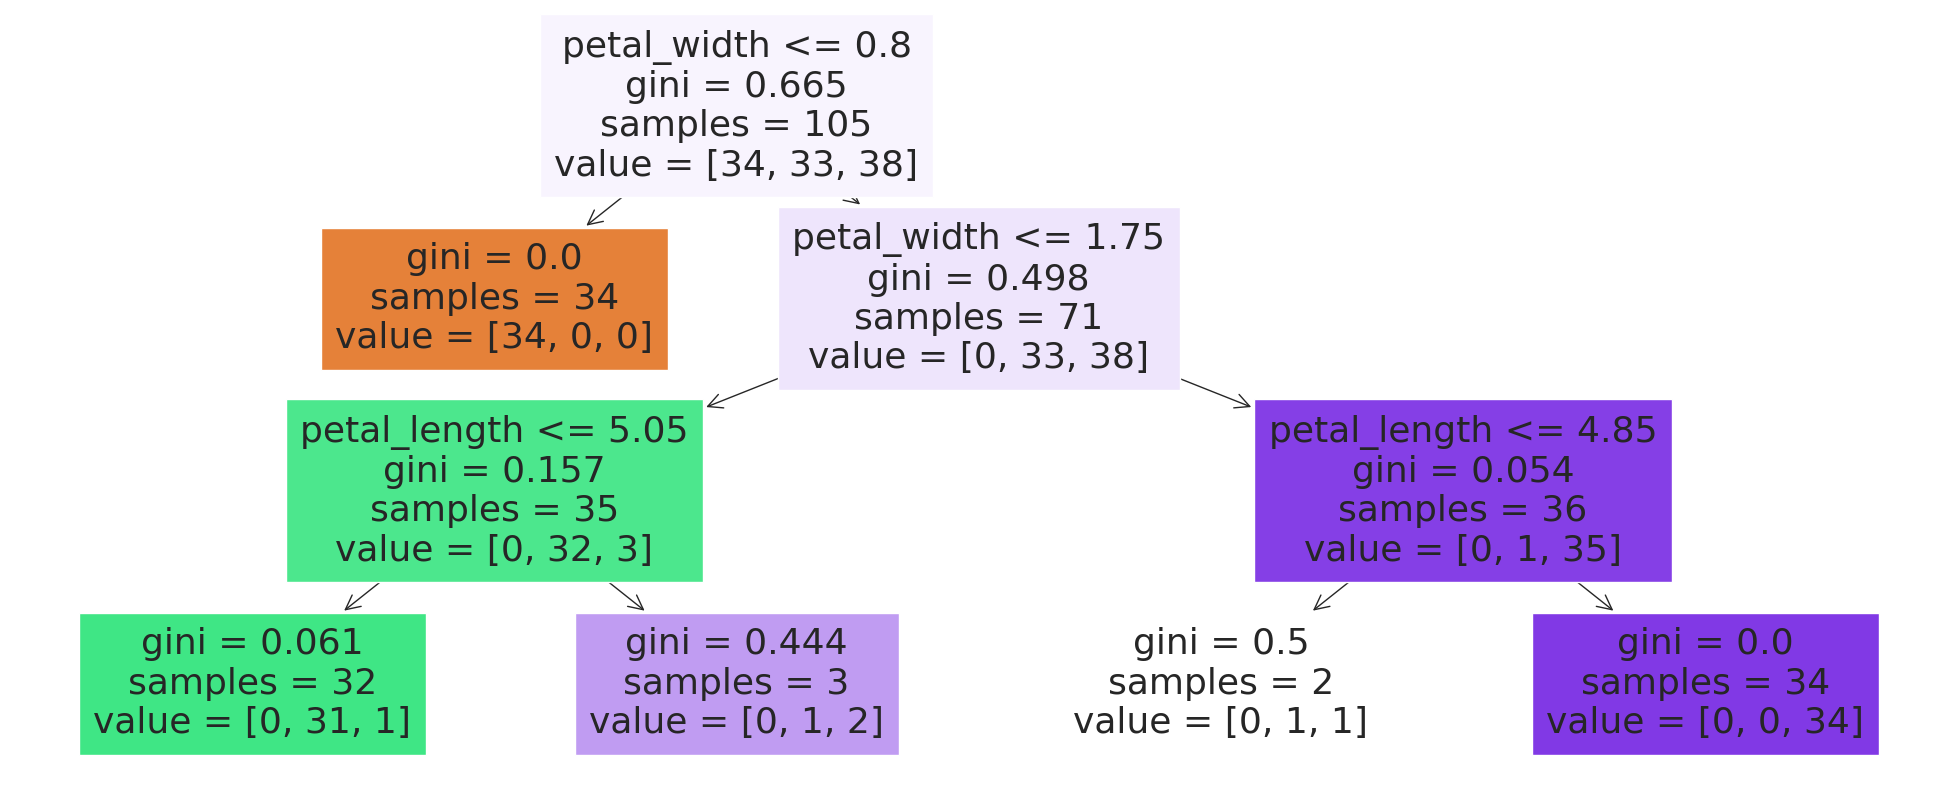

In [34]:
# model visulization
from sklearn import tree
plt.figure(figsize = (25,10))
tree.plot_tree(model_1, feature_names = train_x.columns, max_depth = 3, filled = True)
plt.show()